C:\Users\kavip\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


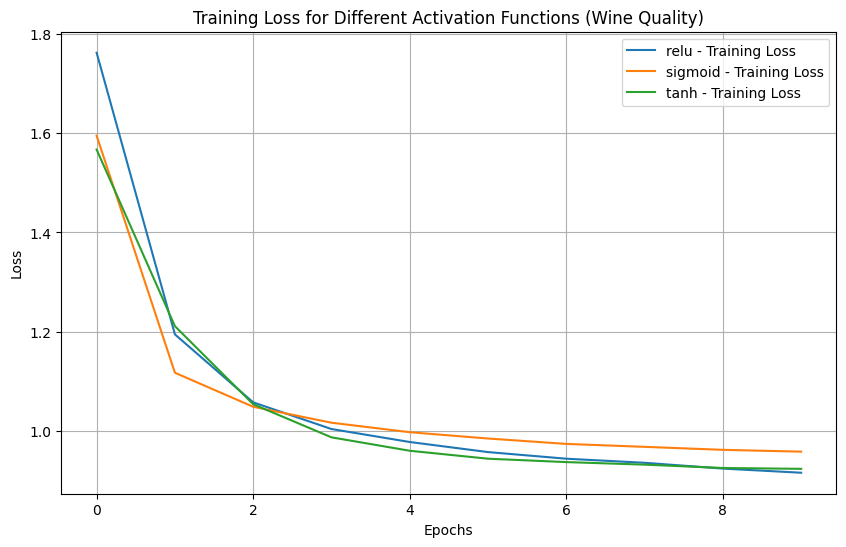

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

X = data.drop('quality', axis=1).values
y = data['quality'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_encoded = to_categorical(y - y.min())
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

def create_model(activation_func):
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation=activation_func),
        Dense(y_encoded.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

activations = ['relu', 'sigmoid', 'tanh']
histories = {}

for activation in activations:
    model = create_model(activation)
    history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=0)
    histories[activation] = history

plt.figure(figsize=(10, 6))
for activation, history in histories.items():
    plt.plot(history.history['loss'], label=f'{activation} - Training Loss')

plt.title('Training Loss for Different Activation Functions (Wine Quality)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()